# House Price Prediction Using Linear Regression

# Data Collection

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)

# Create a DataFrame
columns = ['Feature_1', 'Feature_2', 'Feature_3', 'Target']
df = pd.DataFrame(np.column_stack([X, y]), columns=columns)

# Save the dataset to a CSV file
df.to_csv('house_price_dataset.csv', index=False)

# Display the first few rows of the dataset
print(df.head())


   Feature_1  Feature_2  Feature_3     Target
0  -0.189120  -1.330314   0.921650 -96.182753
1  -0.653329  -0.474945   1.765454 -60.287273
2  -0.224856   0.076852  -0.650003 -28.193682
3   0.570599  -0.662624  -0.763259 -12.697170
4   0.327880  -0.125454   0.085893  11.714149


# Data Exploration and Cleaning

In [3]:
# Load the dataset
df = pd.read_csv("D:\Oasis-infobyte\Housing.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Summary statistics of numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_house_price_dataset.csv', index=False)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000 

# Feature Selection

CORRELATION ANALYSIS

1. Compute the correlation matrix for numerical features.
2. Identify highly correlated features and consider removing one of them.
3. Keep features that have a significant correlation with the target variable

In [6]:
# Load the dataset
df = pd.read_csv('cleaned_house_price_dataset.csv')  # cleaned dataset

# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


UNIVARIATE FEATURE SELECTION:

Use statistical tests (e.g., chi-squared for categorical features or ANOVA for numerical features) to select features that have the most significant impact on the target variable.

In [13]:
df = pd.read_csv("D:\Oasis-infobyte\Housing.csv")

# Select only numerical columns for feature selection
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[numerical_columns]
y = df['price']

# Select top k features based on ANOVA test
k_best = SelectKBest(score_func=f_classif, k='all')
X_new = k_best.fit_transform(X, y)

# Get selected features
selected_features = X.columns[k_best.get_support()]

print("Selected Features:")
print(selected_features)



Selected Features:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


RECURSIVE FEATURE ELIMINATION(RFE):

Use RFE to recursively remove the least important features based on model coefficients.

In [17]:
df = pd.read_csv("D:\Oasis-infobyte\Housing.csv")
# Select only numerical columns for RFE
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[numerical_columns]
y = df['price']

# Initialize the model
model = LinearRegression()

# Perform RFE
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[fit.support_]

print("Selected Features (RFE):")
print(selected_features_rfe)



Selected Features (RFE):
Index(['bathrooms'], dtype='object')


TREE BASED FEATURE IMPORTANCE:

For tree-based models, such as Decision Trees or Random Forests, you can use feature importance scores.

In [19]:

# Fit the model to the data
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Get feature importances
feature_importances = model_rf.feature_importances_

# Display feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")



Feature Importances:
area: 0.5832980764367354
bedrooms: 0.0657452991165247
bathrooms: 0.18543810597543012
stories: 0.07621871275704029
parking: 0.08929980571426958


# Model Training and Evaluation

In [25]:
df = pd.read_csv("D:\Oasis-infobyte\Housing.csv")


# Assume 'features' is a DataFrame containing  feature columns
# and 'price' is a DataFrame containing  variable
features = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
price = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 2292721545725.366
R-squared: 0.5464062355495862
Coefficients: [680058.42414123 112973.18562909 565408.61793601 424354.81176353
 288348.7726677 ]
Intercept: 4706527.385321101


# Visulaizations

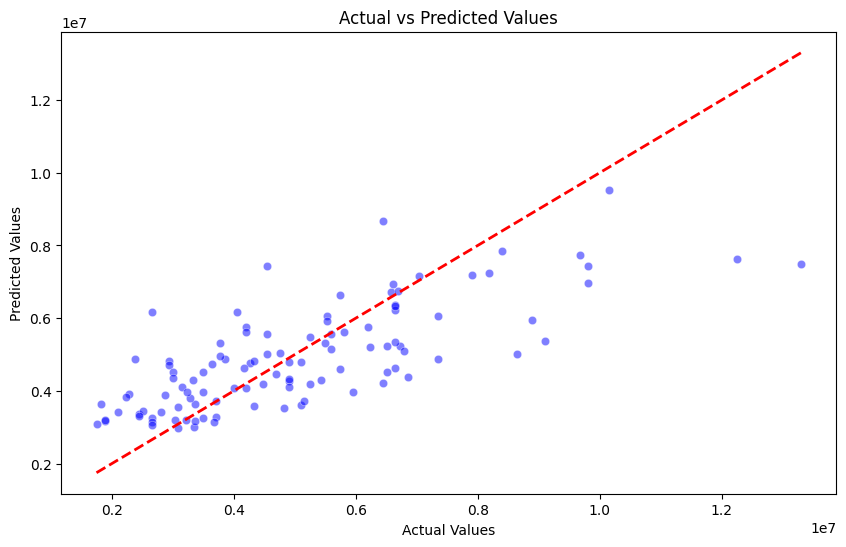

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
